### Menggabungkan Dataset

In [1]:
import pandas as pd

anies = pd.read_csv('hasilpreproanies.csv')
anies['capres'] = 'anies'
pre_anies = anies.iloc[:,12:14]

In [2]:
ganjar = pd.read_csv('hasilpreproganjar.csv')
ganjar['capres'] = 'ganjar'
pre_ganjar = ganjar.iloc[:,12:14]

In [3]:
prabowo = pd.read_csv('hasilpreproprabowo.csv')
prabowo['capres'] = 'prabowo'
pre_prabowo = prabowo.iloc[:,12:14]

In [13]:
df = pd.concat([pre_anies, pre_ganjar, pre_prabowo])
df = df.reset_index()

In [14]:
df.preprocessing[1]

'putar kunci nya menyakinkan pilih prabowo lari anies orang tetangga dukung prabowo alih anies debat usaha menyakin sisi positif nya prabowo ubah dukung prabowo'

In [15]:
df.capres.value_counts()

anies      604
ganjar     543
prabowo    140
Name: capres, dtype: int64

In [16]:
df.to_csv('gabung_data.csv', index=False)

In [104]:
df1 = pd.read_csv('gabung_data.csv')
df1

,index,preprocessing,capres
0,0,salah nya mana logika sederhana gue suara bant...,anies
1,1,putar kunci nya menyakinkan pilih prabowo lari...,anies
2,2,let us recap this calon presiden anies basweda...,anies
3,3,force majeur sepe i sepe inya lolos audit corr...,anies
4,4,salah nya mana logika sederhana gue suara bant...,anies
...,...,...,...
1282,135,indonesia cari ganti presiden jokowi suruh pil...,prabowo
1283,136,prabowo unggul program makan siang gratis raky...,prabowo
1284,137,bangun tahan bencana timbul air water related ...,prabowo
1285,138,sepakat ayahbowo masgibran keren harap pacu wa...,prabowo


In [1]:
import pandas as pd

df = pd.read_csv('ori.csv')
df

,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...
...,...,...,...,...
895,896,positive,Anies-Sandi,"Kali saja bpk @aniesbaswedan @sandiuno lihat, ..."
896,897,positive,Anies-Sandi,Kita harus dapat merangkul semua orang tanpa b...
897,898,positive,Anies-Sandi,Ini jagoanku dibidang digital <Smiling Face Wi...
898,899,positive,Anies-Sandi,#PesanBijak #OkeOce #GubernurGu3 ...


In [83]:
df.Sentiment.value_counts()

negative    450
positive    450
Name: Sentiment, dtype: int64

In [2]:
alay_dict = pd.read_csv('new_kamusalay.csv', header=None, encoding='latin-1')
# Mengganti nama kolom
alay_dict = alay_dict.rename(columns={0: 'original',
                                     1: 'replacement'})

id_stopword_dict = pd.read_csv('stopwordbahasa.csv', header=None, encoding='latin-1')
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n', ' ', text) # Remove every '\n'
    text = re.sub('rt', ' ', text) # Remove every retweet symbol
    text = re.sub('user', ' ', text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Remove every url
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text

def remove_symbolnumeric(text):
    # Menghapus simbol selain huruf dan spasi, dan menggantinya dengan spasi
    text_without_symbols = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Mengganti multiple spasi dengan satu spasi
    text_without_symbols = re.sub(r'\s+', ' ', text_without_symbols)

    return text_without_symbols.strip()

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))

def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join([ ' ' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip() # Remove space in begining and end of sentences
    return text

# Mengubah kata menjadi kata dasar nya. Ex: Programmer, programming = program
def stemming (text):
    return stemmer.stem(text)

def remove_hashtag_prefix(hashtag):
    # Menggunakan ekspresi reguler untuk menghapus kata yang melekat pada hashtag
    cleaned_hashtag = re.sub(r'#\w+', '#', hashtag)
    return cleaned_hashtag

def preprocess(text):
    text = lowercase(text)
    text = remove_unnecessary_char(text)
    text = remove_hashtag_prefix(text)
    text = remove_symbolnumeric(text)
    text = remove_stopword(text)
    text = stemming(text)
    text = normalize_alay(text)
    return text

In [4]:
df['preprocessing'] = df['Text Tweet'].apply(preprocess)

In [6]:
df['preprobaru'] = df['preprocessing'].apply(preprocess)

In [7]:
df

,Id,Sentiment,Pasangan Calon,Text Tweet,preprocessing,preprobaru
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...,akun kloning dukung serang pasangan calon opin...,akun kloning dukung serang pasang calon opini ...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...,bicara kasihan ya lap air mata wkwk,bicara kasihan ya lap air mata wkwk
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...,sih tidak menunggu hasil qc tetapi menunggu mo...,sih tunggu hasil qc tunggu motif cuit susilo b...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...,kasih oh kasih peluru milyar rukun warga mempa...,kasih oh kasih peluru milyar rukun warga mempa...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...,maaf ya dukung hayo dukung putar ronavioleta n...,maaf ya dukung hayo dukung putar ronavioleta n...
...,...,...,...,...,...,...
895,896,positive,Anies-Sandi,"Kali saja bpk @aniesbaswedan @sandiuno lihat, ...",kali bapak aniesbaswedan sandiuno lihat rspun ...,kali aniesbaswedan sandiuno lihat rspun swafot...
896,897,positive,Anies-Sandi,Kita harus dapat merangkul semua orang tanpa b...,rangkul orang batas usia kelamin oke hand vict...,rangkul orang batas usia kelamin oke hand vict...
897,898,positive,Anies-Sandi,Ini jagoanku dibidang digital <Smiling Face Wi...,jago bidang digital smiling face dengan sungla...,jago bidang digital smiling face sunglasses ok...
898,899,positive,Anies-Sandi,#PesanBijak #OkeOce #GubernurGu3 ...,,


In [20]:
df.Tweet[2]

'Kalau aku sih gak nunggu hasil akhir QC tp lagi nunggu motif cuitan pak @SBYudhoyono kayak apa.. pasca #AgusSilvy Nyungsep..'

In [9]:
df.preprocessing[2]

'sih tidak menunggu hasil qc tetapi menunggu motif cuit susilo bambang yudhoyono kayak pasca nyungsep'

In [10]:
df.preprobaru[2]

'sih tunggu hasil qc tunggu motif cuit susilo bambang yudhoyono kayak pasca nyungsep'

In [21]:
df.isna().sum()

Id                0
Sentiment         0
Pasangan Calon    0
Tweet             0
preprocessing     0
preprobaru        0
dtype: int64

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
x = count_vect.fit_transform(df.preprobaru)
x

<900x2315 sparse matrix of type '<class 'numpy.int64'>'
	with 9426 stored elements in Compressed Sparse Row format>

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['preprobaru'])
y = df['Sentiment']

In [24]:
X.shape

(900, 2315)

#### Menyimpan corpus TFIDF

In [25]:
import pickle

vokabuler = vectorizer.vocabulary_

# Menyimpan vokabuler ke file
with open('vokabulerbaru.pkl', 'wb') as file:
    pickle.dump(vokabuler, file)

SVM + ALGORITMA GENETIKA
&
Perbedaan preprocessing dan preprobaru

In [34]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


def initialize_population(pop_size):
    population = []
    for _ in range(pop_size):
        parameters = {
            'C': np.random.uniform(0.1, 100),
            'gamma': np.random.uniform(0.001, 1),
            'kernel': np.random.choice(['linear', 'rbf', 'poly'])
        }
        population.append(parameters)
    return population


def calculate_fitness(parameters, X_train, X_test, y_train, y_test):
    svm_model = SVC(C=parameters['C'], gamma=parameters['gamma'], kernel=parameters['kernel'])
    svm_model.fit(X_train, y_train)
    predictions = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy


def select_parents(population, fitness_scores):
    fitness_scores = np.array(fitness_scores)
    selected_indices = np.random.choice(len(population), size=2, p=fitness_scores/fitness_scores.sum(), replace=False)
    return [population[i] for i in selected_indices]


def crossover(parent1, parent2):
    if isinstance(parent1, dict) and isinstance(parent2, dict):
        child = {
            'C': np.random.choice([parent1['C'], parent2['C']]),
            'gamma': np.random.choice([parent1['gamma'], parent2['gamma']]),
            'kernel': np.random.choice([parent1['kernel'], parent2['kernel']])
        }
    elif isinstance(parent1, list) and isinstance(parent2, list):
        child = {
            'C': np.random.choice([parent1[0]['C'], parent2[0]['C']]),
            'gamma': np.random.choice([parent1[0]['gamma'], parent2[0]['gamma']]),
            'kernel': np.random.choice([parent1[0]['kernel'], parent2[0]['kernel']])
        }
    else:
        raise ValueError("Invalid data types for parents.")
    return child



def mutate(child):
    mutation_prob = 0.2
    if np.random.rand() < mutation_prob:
        child['C'] = np.random.uniform(0.1, 100)
    if np.random.rand() < mutation_prob:
        child['gamma'] = np.random.uniform(0.001, 1)
    if np.random.rand() < mutation_prob:
        child['kernel'] = np.random.choice(['linear', 'rbf', 'poly'])
    return child


def genetic_algorithm(X_train, X_test, y_train, y_test, pop_size=10, generations=5):
    population = initialize_population(pop_size)

    for generation in range(generations):
        fitness_scores = [calculate_fitness(params, X_train, X_test, y_train, y_test) for params in population]

        best_idx = np.argmax(fitness_scores)
        best_params = population[best_idx]
        best_accuracy = fitness_scores[best_idx]

        print(f"Generation {generation+1} - Best Accuracy: {best_accuracy:.4f}, Best Parameters: {best_params}")

        new_population = []

        for _ in range(pop_size // 2):
            parent1 = select_parents(population, fitness_scores)
            parent2 = select_parents(population, fitness_scores)

            child1 = crossover(parent1, parent2)
            child1 = mutate(child1)

            child2 = crossover(parent1, parent2)
            child2 = mutate(child2)

            new_population.extend([child1, child2])

        population = new_population

    return best_params


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)


best_parameters = genetic_algorithm(X_train, X_test, y_train, y_test, pop_size=43, generations=20)

Generation 1 - Best Accuracy: 0.8667, Best Parameters: {'C': 4.194213520670075, 'gamma': 0.4285872165429614, 'kernel': 'rbf'}
Generation 2 - Best Accuracy: 0.8556, Best Parameters: {'C': 4.194213520670075, 'gamma': 0.8239558866557618, 'kernel': 'rbf'}
Generation 3 - Best Accuracy: 0.8667, Best Parameters: {'C': 3.3138295326877354, 'gamma': 0.36792174593995963, 'kernel': 'rbf'}
Generation 4 - Best Accuracy: 0.8556, Best Parameters: {'C': 9.145854888081173, 'gamma': 0.048888782434206704, 'kernel': 'rbf'}
Generation 5 - Best Accuracy: 0.8556, Best Parameters: {'C': 1.2768549126878226, 'gamma': 0.8006690595564618, 'kernel': 'linear'}
Generation 6 - Best Accuracy: 0.8667, Best Parameters: {'C': 2.135807699889878, 'gamma': 0.7547400256763355, 'kernel': 'rbf'}
Generation 7 - Best Accuracy: 0.8556, Best Parameters: {'C': 1.2768549126878226, 'gamma': 0.10518824269133656, 'kernel': 'linear'}
Generation 8 - Best Accuracy: 0.8667, Best Parameters: {'C': 2.135807699889878, 'gamma': 0.39138845136571

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['preprocessing'])
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)


best_parameters = genetic_algorithm(X_train, X_test, y_train, y_test, pop_size=43, generations=20)

Generation 1 - Best Accuracy: 0.8333, Best Parameters: {'C': 52.40410730079416, 'gamma': 0.961835593619865, 'kernel': 'rbf'}
Generation 2 - Best Accuracy: 0.8333, Best Parameters: {'C': 76.52565922527214, 'gamma': 0.9772369656524569, 'kernel': 'rbf'}
Generation 3 - Best Accuracy: 0.8333, Best Parameters: {'C': 71.09915107945082, 'gamma': 0.9056807072879758, 'kernel': 'rbf'}
Generation 4 - Best Accuracy: 0.8333, Best Parameters: {'C': 83.54302200522892, 'gamma': 0.8174594112351633, 'kernel': 'rbf'}
Generation 5 - Best Accuracy: 0.8333, Best Parameters: {'C': 5.945287225322495, 'gamma': 0.9962542840047922, 'kernel': 'rbf'}
Generation 6 - Best Accuracy: 0.8333, Best Parameters: {'C': 43.86951195654675, 'gamma': 0.7646922766968585, 'kernel': 'rbf'}
Generation 7 - Best Accuracy: 0.8333, Best Parameters: {'C': 48.37482550041252, 'gamma': 0.8730436293839269, 'kernel': 'rbf'}
Generation 8 - Best Accuracy: 0.8333, Best Parameters: {'C': 48.37482550041252, 'gamma': 0.810811511134759, 'kernel': '

In [41]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# SVM preprobaru
clfs = SVC(C=1.828207194804518, gamma= 0.28045741206381314, kernel= 'rbf')
clfs.fit(X_train, y_train)
y_pred = clfs.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.83      0.93      0.88        42
    positive       0.93      0.83      0.88        48

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90



In [39]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# SVM preprocessing
clf = SVC(C=4.472698033206007, gamma= 0.7618943408792879, kernel= 'rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.82      0.88      0.85        42
    positive       0.89      0.83      0.86        48

    accuracy                           0.86        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.86      0.86      0.86        90



In [40]:
len(y_test)

90


Confusion Matrix:
 [[39  3]
 [ 8 40]]


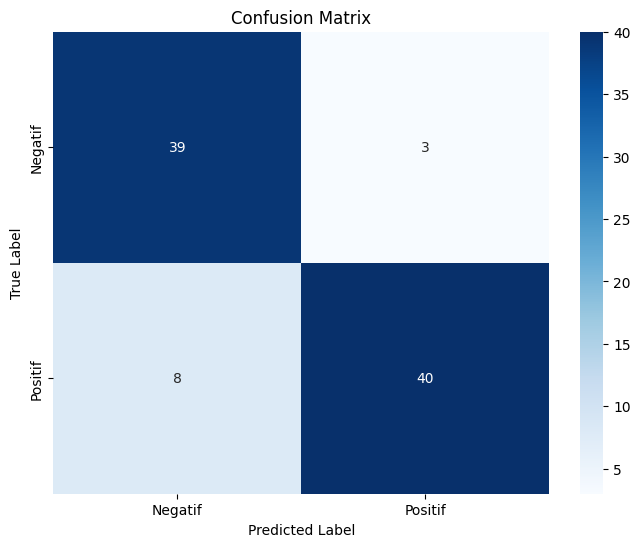

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [42]:
import joblib

joblib.dump(clfs, 'svm88.sav')

['svm88.sav']

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Memuat vokabuler yang telah disimpan
with open('vokabulerbaru.pkl', 'rb') as file:
    vokabuler_loaded = pickle.load(file)

vectorizer = TfidfVectorizer(vocabulary=vokabuler_loaded)
teks_baru_transformed = vectorizer.fit_transform(['saya ingin ganjar menang dan menjadi presiden'])
y = df['Sentiment']

svm_tfidf_model = joblib.load('svm88.sav')
prediksi = svm_tfidf_model.predict(teks_baru_transformed)
prediksi

array(['positive'], dtype=object)

In [17]:
#import library
from tkinter import *            # Untuk membuat GUI
from PIL import ImageTk, Image   # Untuk membaca Gambar
from tkinter import ttk          # Untuk mengatur style widget
import pandas as pd              # untuk membaca dan menyimpan csv
from tkinter import messagebox   # untuk menampilkan showinfo
from docx import Document        # untuk menyimpan entryan ke document
import datetime as dt            # untuk menampilkan tanggal bulan dan tahun pada dataset
import customtkinter             # untuk memperbagus button, combobox
import os 
os.system('cls')
import shutil
import joblib
import pickle
from tkinter import filedialog
import csv
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer

class News_title:
    
    def __init__(self, master):
        self.window = master
        
        # Atur ukuran jendela menjadi 1280x720 piksel
        self.window.geometry('1280x720') 
        
        # Nonaktifkan kemampuan pengubahan ukuran jendela (0, 0 berarti tidak dapat diubah ukurannya)
        self.window.resizable(0, 0) 
        
        # Memberikan judul pada GUI
        self.window.title('News Tittle Clasification')
        
        # Background
        photo_bgDasar = ImageTk.PhotoImage(Image.open('gambarnya/bg_GUI.jpg'))
        self.bgAwal = Label(self.window, image=photo_bgDasar, width=1280, height=730)
        self.bgAwal.image = photo_bgDasar
        self.bgAwal.place(x=0, y=0)
        
        self.timpa = Frame(self.window, bg="#3e63bb", width=500, height=400)
        self.timpa.place(x=700, y=200)

        # Login to your account
        self.entry = Entry(self.window, background="white", fg="black",
                             font=("britannic bold", 12), relief=FLAT)
        self.entry.place(x=100, y=494, width=495, height=47)
        
        alay_dict = pd.read_csv('new_kamusalay.csv', header=None, encoding='latin-1')
        # Mengganti nama kolom
        alay_dict = alay_dict.rename(columns={0: 'original',
                                             1: 'replacement'})
        alay_dict.head()

        id_stopword_dict = pd.read_csv('stopwordbahasa.csv', header=None, encoding='latin-1')
        id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

        factory = StemmerFactory()
        stemmer = factory.create_stemmer()

        def lowercase(text):
            return text.lower()

        def remove_unnecessary_char(text):
            text = re.sub('\n', ' ', text) # Remove every '\n'
            text = re.sub('rt', ' ', text) # Remove every retweet symbol
            text = re.sub('user', ' ', text) # Remove every username
            text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Remove every url
            text = re.sub('  +', ' ', text) # Remove extra spaces
            return text

        def remove_symbolnumeric(text):
            # Menghapus simbol selain huruf dan spasi, dan menggantinya dengan spasi
            text_without_symbols = re.sub(r'[^a-zA-Z\s]', ' ', text)

            # Mengganti multiple spasi dengan satu spasi
            text_without_symbols = re.sub(r'\s+', ' ', text_without_symbols)

            return text_without_symbols.strip()

        alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))

        def normalize_alay(text):
            return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

        def remove_stopword(text):
            text = ' '.join([ ' ' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
            text = re.sub('  +', ' ', text) # Remove extra spaces
            text = text.strip() # Remove space in begining and end of sentences
            return text

        # Mengubah kata menjadi kata dasar nya. Ex: Programmer, programming = program
        def stemming (text):
            return stemmer.stem(text)

        def remove_hashtags_user(text):
            tweet_without_hashtags = ' '.join(word for word in text.split() if not word.startswith('#'))

            tweet_without_mentions = re.sub(r'@\w+', '', tweet_without_hashtags)

            return tweet_without_mentions

        def preprocess(text):
            text = lowercase(text)
            text = remove_unnecessary_char(text)
            text = remove_hashtags_user(text)
            text = remove_symbolnumeric(text)
            text = normalize_alay(text)
            text = remove_stopword(text)
            text = stemming(text)
            return text

        
        def prediksi():
            
            if self.entry.get():
                try:
                    self.pred.destroy()
                    
                except:
                    pass
            
               

                # Memuat vokabuler yang telah disimpan
                with open('vokabulerbaru.pkl', 'rb') as file:
                    vokabuler_loaded = pickle.load(file)

                vectorizer_baru = TfidfVectorizer(vocabulary=vokabuler_loaded)

                teks_baru = self.entry.get()
                teks_baru = preprocess(teks_baru)
                teks_baru_transformed = vectorizer_baru.fit_transform([teks_baru])

                svm_tfidf_model = joblib.load('svm88.sav')
                prediksi = svm_tfidf_model.predict(teks_baru_transformed)
                
                if prediksi[0] == 'positive':
                    photo_pred = ImageTk.PhotoImage(Image.open('gambarnya/positif-01.png'))
                    self.pred = Label(self.timpa, image=photo_pred, bg='#3e63bb',width=1280, height=730)
                    self.pred.image = photo_pred
                    self.pred.place(x=-390, y=-170)
                    
                else:
                    photo_pred = ImageTk.PhotoImage(Image.open('gambarnya/negatif-01.png'))
                    self.pred = Label(self.timpa, image=photo_pred, bg='#3e63bb',width=1280, height=730)
                    self.pred.image = photo_pred
                    self.pred.place(x=-390, y=-170)
                
                
            else:
                messagebox.showinfo("Peringatan", "Entry belum di isi")

                
        def predik_csv():
            
            def process_csv(file):
                global df
                df = pd.read_csv(file_path)
                df = df.head(10)
                X = df["preprocessing"].apply(preprocess)
                
                # Memuat vokabuler yang telah disimpan
                with open('vokabulerbaru.pkl', 'rb') as file:
                    vokabuler_loaded = pickle.load(file)

                vectorizer_baru = TfidfVectorizer(vocabulary=vokabuler_loaded)

                teks_baru_transformed = vectorizer_baru.fit_transform(X)

                svm_tfidf_model = joblib.load('svm88.sav')
                prediksi = svm_tfidf_model.predict(teks_baru_transformed)
            
                df["Sentiment"] = prediksi
                
                def display_dataframe():
                    for i, row in df.iterrows():
                        tree.insert('', 'end', values=(row['Tweet'], row['Sentiment']))
                        
                # Buat TreeView
                columns = ('Tweet', 'Sentiment')
                tree = ttk.Treeview(self.timpa, columns=columns, show='headings')
                tree.tag_configure('mytag', font=('Gungsuh', 13))
                
                
                # Atur lebar kolom
                for col in columns:
                    if col == "Tweet":
                        tree.heading(col, text=col)
                        tree.column(col, width=400)
                        continue
                        
                    tree.heading(col, text=col)
                    tree.column(col, width=100)  # Ganti lebar sesuai kebutuhan

                tree.place(x=0,y=0, height=400)

                # Tambahkan data DataFrame ke dalam TreeView
                display_dataframe()
                
                for item in tree.get_children():
                    tree.item(item, tags=('mytag',))

            # Fungsi untuk membuka jendela dialog pemilihan file CSV
            global file_path
            file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
            if file_path:
                process_csv(file_path)


        def export_to_csv():
            file_path_export = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV files", "*.csv")])

            if file_path_export:
                df.to_csv(file_path_export, index=False)
                messagebox.showinfo("Ekspor Sukses", "Data has been exported successfully!")      
                    

        def reset():
            try:
                self.pred.destroy()
            except:
                messagebox.showinfo("Peringatan", "Entry belum di isi")

        # SEARCH
        image = Image.open('gambarnya/searcc.png')

        # Resize the image - make sure to provide a tuple for the size (width, height)
        resized_image = image.resize((40, 40), Image.Resampling.NEAREST)  # or use any other resampling filter as needed

        # Convert to a format Tkinter can use
        photo_search = ImageTk.PhotoImage(resized_image)
        self.search = Button(self.window, image=photo_search, bg='white',relief=FLAT, command=prediksi)
        self.search.image = photo_search
        self.search.place(x=550, y=495)
        
        # FILE
        image = Image.open('gambarnya/file.png')

        # Resize the image - make sure to provide a tuple for the size (width, height)
        resized_image = image.resize((40, 40), Image.Resampling.NEAREST) # or use any other resampling filter as needed
 
        # Convert to a format Tkinter can use
        photo_file = ImageTk.PhotoImage(resized_image)
        self.file = Button(self.window, image=photo_file, bg='white',relief=FLAT, command=predik_csv)
        self.file.image = photo_file
        self.file.place(x=595, y=494, height=47)
        self.btnreset=customtkinter.CTkButton(master=self.window,text=' Reset ',text_font=('Courier New', 20), corner_radius=0,text_color="black", width=150, height=40, fg_color="white",hover_color="#444352", command=reset).place(x=320, y=550)
        self.btnreset=customtkinter.CTkButton(master=self.window,text=' Export ',text_font=('Courier New', 20), corner_radius=0,text_color="black", width=150, height=40, fg_color="white",hover_color="#444352", command=export_to_csv).place(x=488, y=550)
        
window = Tk()
root = News_title(window)
window.mainloop()

In [107]:
df1.isna().sum()

index            0
preprocessing    1
capres           0
dtype: int64

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import pandas as pd

df = pd.read_csv('capresh.csv')
df

# Memuat vokabuler yang telah disimpan
with open('vokabulerbaru.pkl', 'rb') as file:
    vokabuler_loaded = pickle.load(file)

X = df['preprocessing']
vectorizer = TfidfVectorizer(vocabulary=vokabuler_loaded)
teks_baru_transformed = vectorizer.fit_transform(X)

svm_tfidf_model = joblib.load('svm88.sav')
prediksi = svm_tfidf_model.predict(teks_baru_transformed)
df['label'] = prediksi

In [47]:
df

,preprocessing,capres,label
0,bospurwa prabowo salah nya mana logika sederha...,anies,negative
1,andrerosiade putarankunci nya menyakinkan pili...,anies,negative
2,let us recap this calon presiden anies basweda...,anies,positive
3,papaloren force majeur sepe i sepe inya lolos ...,anies,negative
4,salah nya mana logika sederhana gue suara bant...,anies,negative
...,...,...,...
1282,seridianawati yusufagro prabowo aditbandit ale...,prabowo,negative
1283,ridhookuswandi prabowo unggul program makan si...,prabowo,positive
1284,bangun tahan bencana timbul air water related ...,prabowo,negative
1285,prabowosulbar arifahyaceh prabowo gerindra sep...,prabowo,positive


In [16]:
df.to_csv('scraplabel.csv', index=False)

In [48]:
anis = df[df.capres == 'anies']
prabowo = df[df.capres == 'prabowo']
ganjar = df[df.capres == 'ganjar']

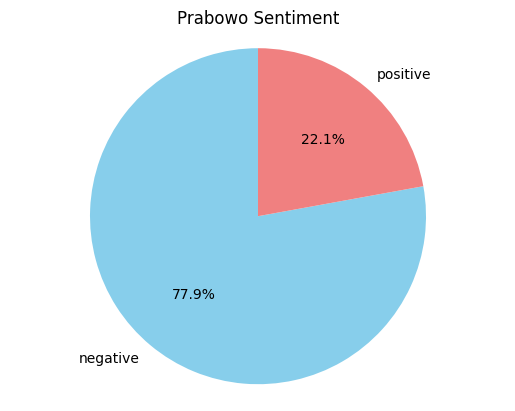

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Visualisasi Pie Chart
labels = prabowo['label'].value_counts().index
sizes = prabowo['label'].value_counts().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.axis('equal')  # Menyamakan sumbu x dan y untuk membuat lingkaran
plt.title('Prabowo Sentiment')
plt.show()

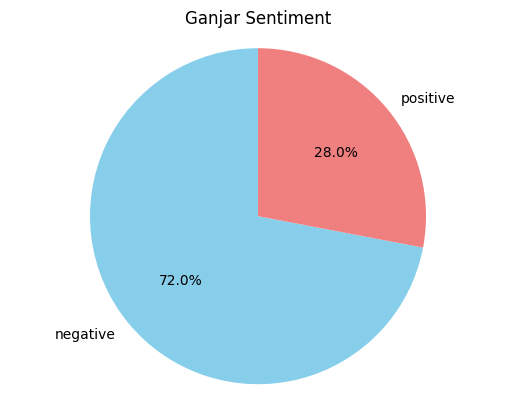

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# Visualisasi Pie Chart
labels = ganjar['label'].value_counts().index
sizes = ganjar['label'].value_counts().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.axis('equal')  # Menyamakan sumbu x dan y untuk membuat lingkaran
plt.title('Ganjar Sentiment')
plt.show()

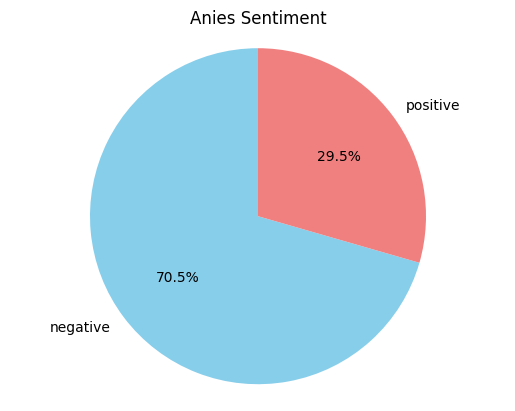

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


# Visualisasi Pie Chart
labels = anis['label'].value_counts().index
sizes = anis['label'].value_counts().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.axis('equal')  # Menyamakan sumbu x dan y untuk membuat lingkaran
plt.title('Anies Sentiment')
plt.show()